# Water Potability

![Water Potability](./images/pexels-photo-416528.jpeg)


# Table of content
##### 1.Import library
##### 2.Exploratory data analysis
##### 3.Data cleaning
##### 4.Removing outilers
##### 5.Spliting data and model buliding
##### 6.predictive System

# 1.Import Libraries

In [1]:
#Standard libraries for data analysis:----------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# modules for data preprocessing-------------------------------------
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


#sklearn modules for Model Selection--------------------------------------
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm  import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("C:\\Users\\Shivanikeshri\\Downloads\\water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## About the dataset
pH:

It measures the acidity or alkalinity of the water. pH values range from 0 to 14, with 7 being neutral.

Hardness:

Unit: mg/L (milligrams per liter). 
It indicates the concentration of calcium and magnesium in the water. Higher values suggest harder water.

Solids:

Unit: ppm (parts per million). 
It represents the total concentration of dissolved and suspended solids in the water. Includes both dissolved solids (TDS) and suspended solids.

Chloramines:

Unit: ppm (parts per million). 
It measures the concentration of chloramines, which are disinfectants used to treat water.

Sulfate:

Unit: mg/L (milligrams per liter). 
It indicates the concentration of sulfate ions in the water. High levels can affect the taste and quality of water.

Conductivity:

Unit: µS/cm (microsiemens per centimeter). 
It measures the water’s ability to conduct electricity, which correlates with the ion concentration. Higher values indicate higher ionic content.

Organic_carbon:

Unit: ppm (parts per million).  
It represents the concentration of organic carbon compounds in the water. Organic carbon levels can indicate the presence of organic pollutants.

Trihalomethanes:

Unit: µg/L (micrograms per liter). 
It measures the concentration of trihalomethanes, which are byproducts of water disinfection with chlorine. High levels can be harmful to health.

Turbidity:

Unit: NTU (Nephelometric Turbidity Units). 
It indicates the cloudiness of the water caused by large numbers of individual particles. Higher turbidity can be a sign of contaminants.

Potability:

 Binary (0 or 1). 
It indicates whether the water is potable (safe to drink) or not. 0 represents non-potable, and 1 represents potable.

# 2. Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Portablity is the only integer data type

In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.shape

(3276, 10)

#### check for correlation

<Axes: >

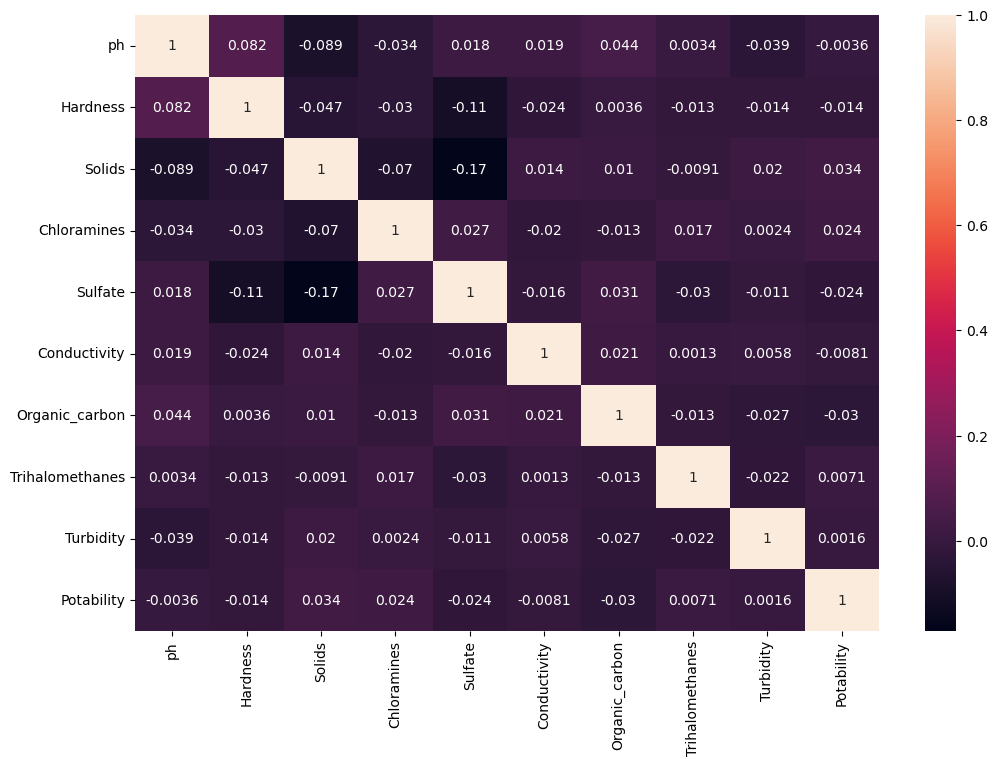

In [8]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)

All features seems to  have weak (low) correlation with potability and among them solids has highest correlation with potablity

<Axes: xlabel='Potability', ylabel='count'>

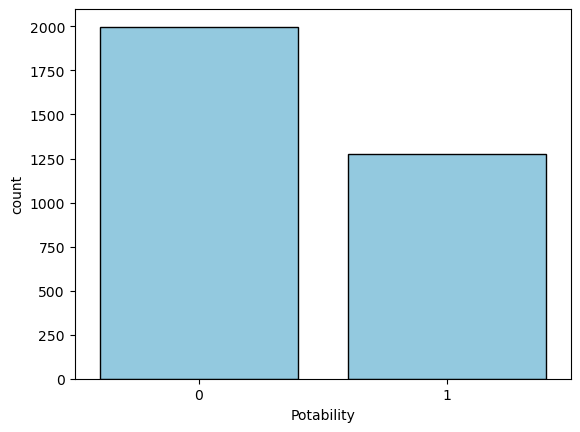

In [9]:
# Check target feature

sns.countplot(x='Potability', data= df, color='skyblue', edgecolor='black')

#### Imbalanced data

In [10]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

C:\Users\Shivanikeshri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shivanikeshri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shivanikeshri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shivanikeshri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

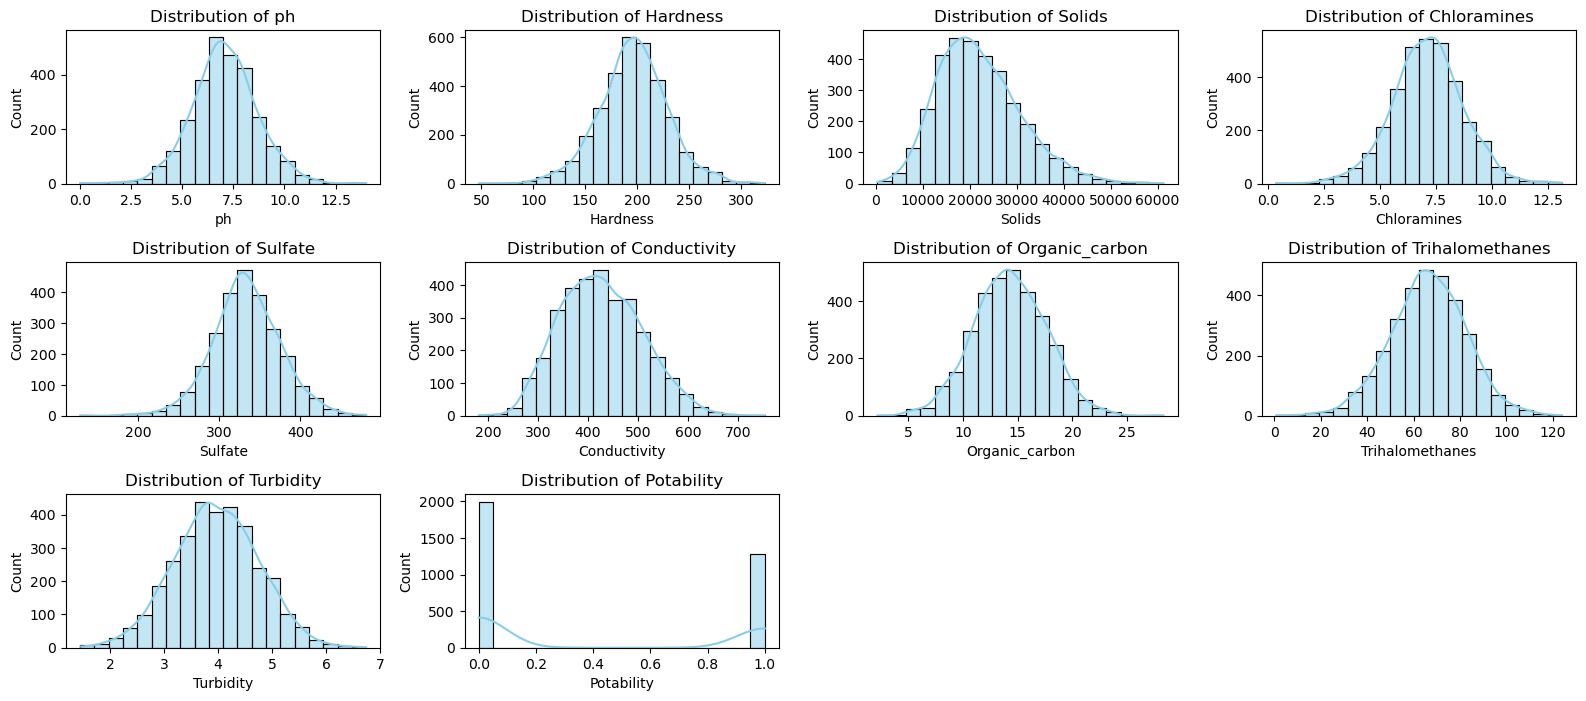

In [11]:
# Check distribution of each feature with Hist Plot

plt.figure(figsize=(16,9))
plt.subplots_adjust(wspace=0.3, hspace=0.3)


# Loop through each column in the dataset
o = 1
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, o)
    sns.histplot(data=df, x=col, kde=True, color='skyblue', edgecolor='black', bins=20)
    plt.title(f'Distribution of {col}')
    o += 1

# Display the plots
plt.tight_layout()
plt.show()


generally speaking all feature are similar to  normal distribution except solid column which is right skewed

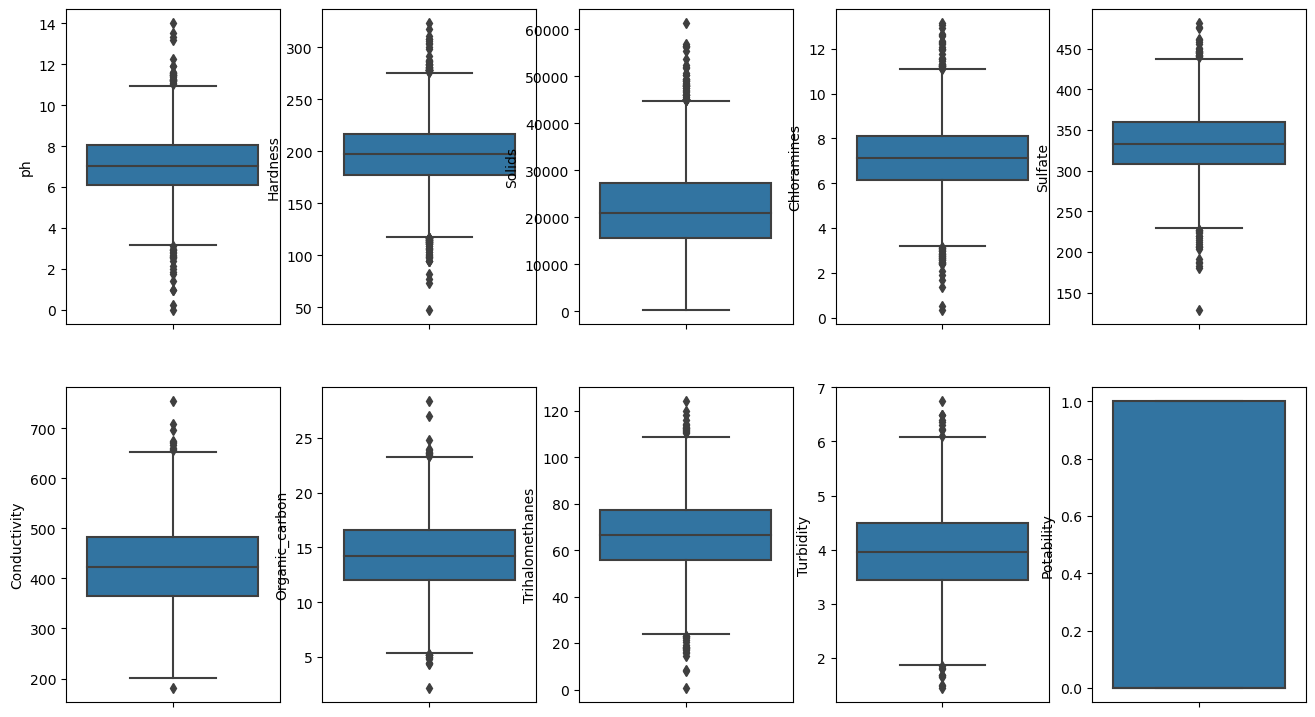

In [12]:
#visualising dataset and also checking for outliers

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (16,9))
ax = ax.flatten()
index = 0
for col,values in df.items():
    sns.boxplot(y=col, data= df, ax= ax[index])
    index += 1

Non linear relationship

# 3. Data cleaning

In [13]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

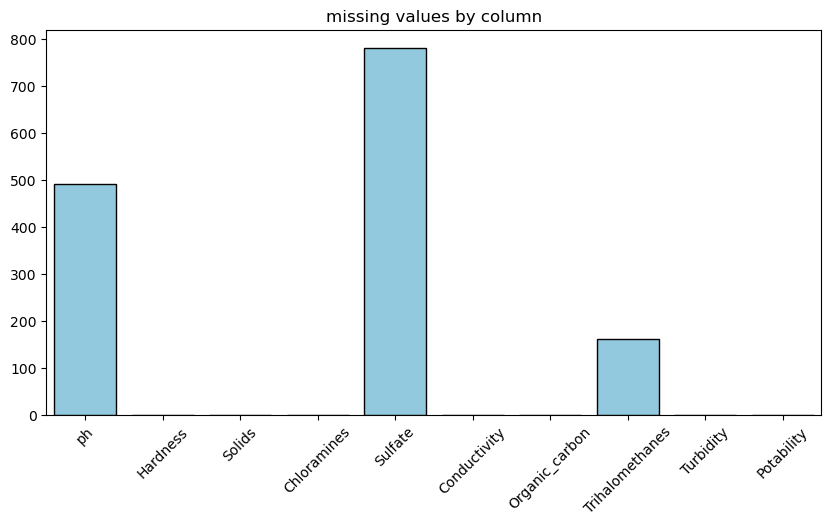

In [14]:
# Check ISNA sum
isna_sum = df.isna().sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=isna_sum.index, y=isna_sum.values, color='skyblue', edgecolor='black')
plt.title('missing values by column')
plt.xticks(rotation=45)
plt.show()

### Ph, Chioramines Sulphates, Organic_carbon contains null value


In [15]:
# filling missing values
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [16]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [17]:
df.duplicated().sum()

0

# 4. Removing Outliers

Below Converts Decimal Value to Int64 with Rounding Each value its nearest value eg: 3.9 to 4

In [18]:
for cols in df.columns: 
    if cols!="Potability":
        df[cols] = df[cols].round().astype('int64')

df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,334,593,15,56,5,0
2,8,224,19910,9,334,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0


Below Is the Code Remove SPECIFIC Outliers Values from Main Dataframe

In [19]:
# finding outliers data
Q1 = df['Hardness'].quantile(0.25)
Q3 = df['Hardness'].quantile(0.75)
IQR = Q3-Q1
# identify outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['Hardness']<lower_bound) | (df['Hardness']>upper_bound)]
values_out_of_range = df[(df['Hardness']<Q1) | (df['Hardness']>Q3)]
outliers_df = pd.DataFrame(outliers)

df = df.drop(outliers_df.index)
df.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,334,593,15,56,5,0
2,8,224,19910,9,334,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0


In [20]:
# finding outliers data
Q1 = df['Trihalomethanes'].quantile(0.25)
Q3 = df['Trihalomethanes'].quantile(0.75)
IQR = Q3-Q1
# identify outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['Trihalomethanes']<lower_bound) | (df['Trihalomethanes']>upper_bound)]
values_out_of_range = df[(df['Trihalomethanes']<Q1) | (df['Trihalomethanes']>Q3)]
outliers_df = pd.DataFrame(outliers)

df = df.drop(outliers_df.index)
df.head(4)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,334,593,15,56,5,0
2,8,224,19910,9,334,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0


In [21]:
# finding outliers data
Q1 = df['Solids'].quantile(0.25)
Q3 = df['Solids'].quantile(0.75)
IQR = Q3-Q1
# identify outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['Solids']<lower_bound) | (df['Solids']>upper_bound)]
values_out_of_range = df[(df['Solids']<Q1) | (df['Solids']>Q3)]
outliers_df = pd.DataFrame(outliers)

df = df.drop(outliers_df.index)
df.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,334,593,15,56,5,0
2,8,224,19910,9,334,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0


In [22]:
# finding outliers data
Q1 = df['Sulfate'].quantile(0.25)
Q3 = df['Sulfate'].quantile(0.75)
IQR = Q3-Q1
# identify outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['Sulfate']<lower_bound) | (df['Sulfate']>upper_bound)]
values_out_of_range = df[(df['Sulfate']<Q1) | (df['Sulfate']>Q3)]
outliers_df = pd.DataFrame(outliers)

df = df.drop(outliers_df.index)
df.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,334,593,15,56,5,0
2,8,224,19910,9,334,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0


In [23]:
# finding outliers data
Q1 = df['Chloramines'].quantile(0.25)
Q3 = df['Chloramines'].quantile(0.75)
IQR = Q3-Q1
# identify outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['Chloramines']<lower_bound) | (df['Chloramines']>upper_bound)]
values_out_of_range = df[(df['Chloramines']<Q1) | (df['Chloramines']>Q3)]
outliers_df = pd.DataFrame(outliers)

df = df.drop(outliers_df.index)
df.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,205,20791,7,369,564,10,87,3,0
1,4,129,18630,7,334,593,15,56,5,0
2,8,224,19910,9,334,419,17,66,3,0
3,8,214,22018,8,357,363,18,100,5,0


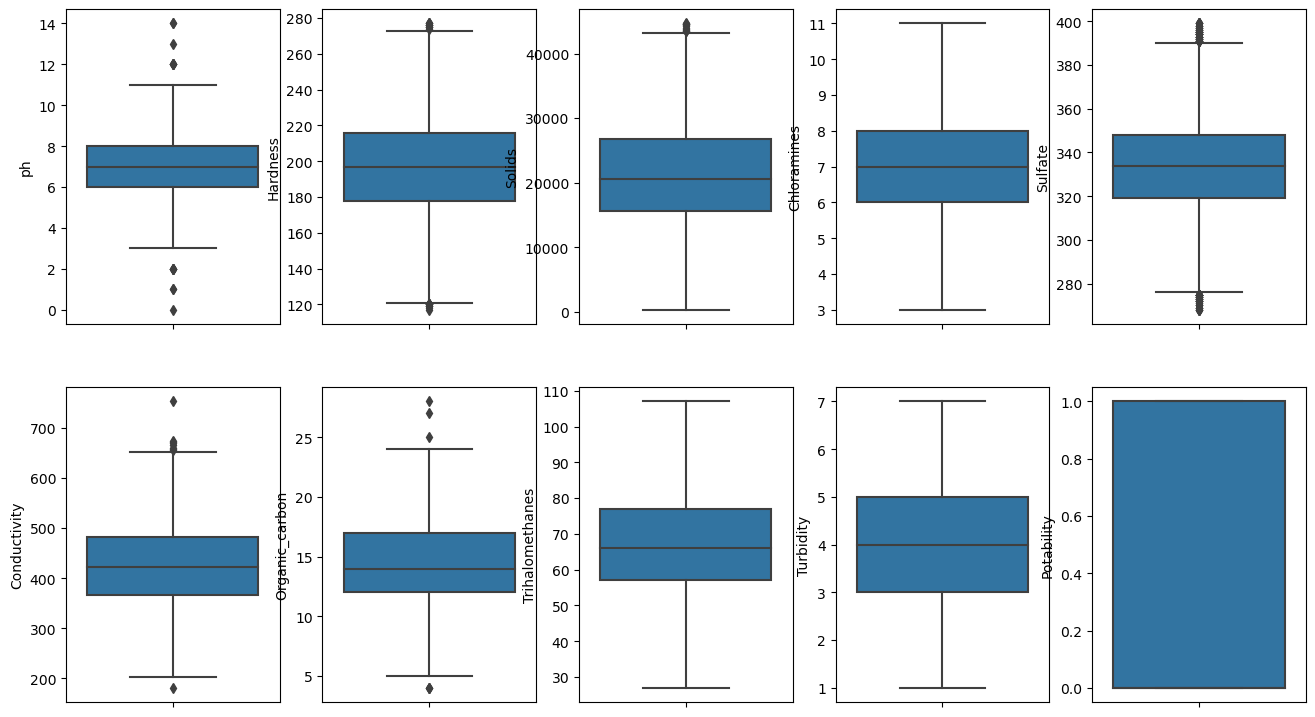

In [24]:
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (16,9))
ax = ax.flatten()
index = 0
for col,values in df.items():
    sns.boxplot(y=col, data= df, ax= ax[index])
    index += 1

Cleared all Outliers from Features : Hardness,Trihalomethanes and Solids

In [25]:
df.shape

(2842, 10)

# 5.Spliting data and model buliding

In [26]:
X = df.drop('Potability', axis = 1)
y = df['Potability'] 

In [27]:
y.value_counts()


Potability
0    1801
1    1041
Name: count, dtype: int64

#### Handling imbalance data

SMOTE (Synthetic Minority Over-sampling Technique)¶
SMOTE : SMOTE is an data balancing technique used during binary classification. It tackles imbalance data problem by generating synthetic samples for minority class.

So here our minority class is value : 1

In [28]:


sm = SMOTE(random_state=42)

# Fit and apply the transform
X_resampled, y_resampled = sm.fit_resample(X, y)

In [29]:
y_resampled.value_counts()

Potability
0    1801
1    1801
Name: count, dtype: int64

#### Training and testing Dataset

In [30]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

In [31]:
X_train.shape, X_test.shape

((2881, 9), (721, 9))

### Logistic Regression

In [32]:
# creating the object of model and training the model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

C:\Users\Shivanikeshri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
#prediction
pred_lr = model_lr.predict(X_test)
accuracy_lr =accuracy_score(y_test,pred_lr)
print('accuracy_score =', accuracy_lr)
print('confusion_matrix =\n',confusion_matrix(y_test, pred_lr))
print('classification_report =\n', classification_report(y_test, pred_lr))


accuracy_score = 0.5131761442441054
confusion_matrix =
 [[176 192]
 [159 194]]
classification_report =
               precision    recall  f1-score   support

           0       0.53      0.48      0.50       368
           1       0.50      0.55      0.53       353

    accuracy                           0.51       721
   macro avg       0.51      0.51      0.51       721
weighted avg       0.51      0.51      0.51       721



### Decision Tree Classifier

In [34]:
# creating the object of model and training the model

model_dt = DecisionTreeClassifier(max_depth = 4)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [35]:
#prediction
pred_dt = model_dt.predict(X_test)
accuracy_dt =accuracy_score(y_test,pred_dt)
print('accuracy_score =', accuracy_dt)
print('confusion_matrix =\n',confusion_matrix(y_test, pred_dt))
print('classification_report =\n', classification_report(y_test, pred_dt))


accuracy_score = 0.5672676837725381
confusion_matrix =
 [[137 231]
 [ 81 272]]
classification_report =
               precision    recall  f1-score   support

           0       0.63      0.37      0.47       368
           1       0.54      0.77      0.64       353

    accuracy                           0.57       721
   macro avg       0.58      0.57      0.55       721
weighted avg       0.59      0.57      0.55       721



### Random Forest Classifiers

In [36]:
# creating the object of model and training the model

model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
#prediction

pred_rf = model_rf.predict(X_test)
accuracy_rf =accuracy_score(y_test,pred_rf)
print('accuracy_score =', accuracy_rf)
print('confusion_matrix =\n',confusion_matrix(y_test, pred_rf))
print('classification_report =\n', classification_report(y_test, pred_rf))


accuracy_score = 0.694868238557559
confusion_matrix =
 [[256 112]
 [108 245]]
classification_report =
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       368
           1       0.69      0.69      0.69       353

    accuracy                           0.69       721
   macro avg       0.69      0.69      0.69       721
weighted avg       0.69      0.69      0.69       721



### KNeighbors Classifiers

In [38]:
#training and predicting the model
for i in range(4,12):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(X_train, y_train)
    pred_knn = model_knn.predict(X_test)
    print('accuracy =',accuracy_score(y_test,pred_knn), 'i =' ,i)

accuracy = 0.608876560332871 i = 4
accuracy = 0.6199722607489597 i = 5
accuracy = 0.6047156726768377 i = 6
accuracy = 0.5908460471567267 i = 7
accuracy = 0.5839112343966713 i = 8
accuracy = 0.59500693481276 i = 9
accuracy = 0.5742024965325936 i = 10
accuracy = 0.5686546463245492 i = 11


In [39]:
model_knn = KNeighborsClassifier(n_neighbors = 4)
model_knn.fit(X_train, y_train)
pred_knn = model_knn.predict(X_test)
accuracy_knn =accuracy_score(y_test,pred_knn)
print('accuracy_score =', accuracy_knn)
print('confusion_matrix =\n',confusion_matrix(y_test, pred_knn))
print('classification_report =\n', classification_report(y_test, pred_knn))


accuracy_score = 0.608876560332871
confusion_matrix =
 [[254 114]
 [168 185]]
classification_report =
               precision    recall  f1-score   support

           0       0.60      0.69      0.64       368
           1       0.62      0.52      0.57       353

    accuracy                           0.61       721
   macro avg       0.61      0.61      0.61       721
weighted avg       0.61      0.61      0.61       721



### Support Vector Machine

In [40]:
# creating the object of model and training the model
model_svc = SVC(kernel = "rbf")
model_svc.fit(X_train, y_train)

SVC()

In [41]:
#prediction
pred_svc = model_svc.predict(X_test)
accuracy_svc =accuracy_score(y_test,pred_svc)
print('accuracy_score =', accuracy_svc)
print('confusion_matrix =\n',confusion_matrix(y_test, pred_svc))
print('classification_report =\n', classification_report(y_test, pred_svc))


accuracy_score = 0.5284327323162274
confusion_matrix =
 [[224 144]
 [196 157]]
classification_report =
               precision    recall  f1-score   support

           0       0.53      0.61      0.57       368
           1       0.52      0.44      0.48       353

    accuracy                           0.53       721
   macro avg       0.53      0.53      0.52       721
weighted avg       0.53      0.53      0.53       721



### Adaboost Classifiers

In [42]:
# creating the object of model and training the model
model_adb = AdaBoostClassifier(n_estimators = 100)
model_adb.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [43]:
#prediction
pred_adb = model_adb.predict(X_test)
accuracy_adb =accuracy_score(y_test,pred_adb)
print('accuracy_score =', accuracy_adb)
print('confusion_matrix =\n',confusion_matrix(y_test, pred_adb))
print('classification_report =\n', classification_report(y_test, pred_adb))


accuracy_score = 0.550624133148405
confusion_matrix =
 [[185 183]
 [141 212]]
classification_report =
               precision    recall  f1-score   support

           0       0.57      0.50      0.53       368
           1       0.54      0.60      0.57       353

    accuracy                           0.55       721
   macro avg       0.55      0.55      0.55       721
weighted avg       0.55      0.55      0.55       721



### XGBOOST Classifier

In [44]:
# creating the object of model and training the model
model_xgb = XGBClassifier(n_estimators = 200, learning_rate = 0.03)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
#prediction
pred_xgb = model_xgb.predict(X_test)
accuracy_xgb =accuracy_score(y_test,pred_lr)
print('accuracy_score =', accuracy_xgb)
print('confusion_matrix =\n',confusion_matrix(y_test, pred_xgb))
print('classification_report =\n', classification_report(y_test, pred_xgb))


accuracy_score = 0.5131761442441054
confusion_matrix =
 [[233 135]
 [111 242]]
classification_report =
               precision    recall  f1-score   support

           0       0.68      0.63      0.65       368
           1       0.64      0.69      0.66       353

    accuracy                           0.66       721
   macro avg       0.66      0.66      0.66       721
weighted avg       0.66      0.66      0.66       721



In [46]:
models = pd.DataFrame({
    "Model" : ["Logistic Regression",
                 "Decision Tree",
                 "Random Forest",
                 "KNN",
                 "SVM",
                 "Adaboost",
                 "XGboost"],
    "Accuracy_score" : [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_knn,
                          accuracy_svc, accuracy_adb, accuracy_xgb]
})
        

In [47]:
models

,Model,Accuracy_score
0,Logistic Regression,0.513176
1,Decision Tree,0.567268
2,Random Forest,0.694868
3,KNN,0.608877
4,SVM,0.528433
5,Adaboost,0.550624
6,XGboost,0.513176


,Model,Accuracy_score
2,Random Forest,0.694868
3,KNN,0.608877
1,Decision Tree,0.567268
5,Adaboost,0.550624
4,SVM,0.528433
0,Logistic Regression,0.513176
6,XGboost,0.513176


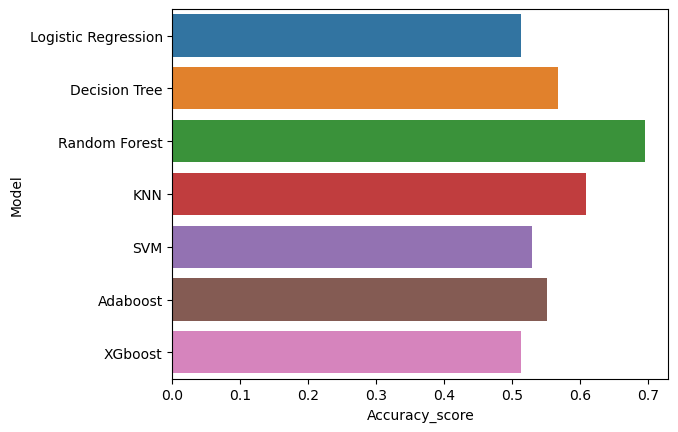

In [48]:
sns.barplot(x = "Accuracy_score", y = "Model", data = models)
models.sort_values (by ="Accuracy_score", ascending = False)

##### Best model is Random Forest with highest accuracy

### Hypertuning 

In [49]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

params_RF = {"min_samples_split": [2,6],
             "min_samples_leaf":  [1,4],
             "n_estimators" :[100,200,300],
             "criterion":["gini", 'entropy']
            }
cv_method = StratifiedKFold(n_splits = 3)
GridSearchCV_RF = GridSearchCV(estimator = RandomForestClassifier(),
                               param_grid = params_RF,
                               cv = cv_method,
                               verbose = 1,
                               n_jobs = 2,
                               scoring = "accuracy",
                               return_train_score = True
                              )
GridSearchCV_RF.fit(X_train,y_train)
best_params_RF = GridSearchCV_RF.best_params_
print("Best hyperparameters for Random Forests are =",best_params_RF)
                               

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best hyperparameters for Random Forests are = {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [50]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator.fit(X_train, y_train)
y_pred_best = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       368
           1       0.70      0.71      0.71       353

    accuracy                           0.71       721
   macro avg       0.71      0.71      0.71       721
weighted avg       0.71      0.71      0.71       721



In [51]:
print(f"Accuracy of Random Forest Model = {round(accuracy_score(y_test, y_pred_best)*100,2)}%")

Accuracy of Random Forest Model = 71.01%


# 6. Predictive system

In [52]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
ph = int(input("Enter the ph value"))
Hardness = int(input("Enter the Hardness value"))
solids = int(input("Enter the solids value"))
chloramines = int(input("Enter the chloramines value"))
sulfate = int(input("Enter the sulfate value "))
conductivity = int(input("Enter the conductivity value"))
organic_carbon = int(input("Enter the organic_carbon value"))
trihalomethanes = int(input("enter the trihalomethanes value"))
turbidity = int(input("Enter the turbidity value"))

In [ ]:
input_data = [[ph, Hardness, solids,chloramines, sulfate, conductivity, organic_carbon,
              trihalomethanes, turbidity]]

In [ ]:
model_prediction = best_estimator.predict(input_data)
model_prediction

In [ ]:
if model_prediction[0] == 0:
    print("Water is not safe for consumption")
else:
    print("Water is safe for consumption")